In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
round((leads.isnull().sum()/leads.shape[0])*100,2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [6]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
leads = leads.replace(['Select','select'],np.nan)

In [8]:
round((leads.isnull().sum()/len(leads))*100,2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
leads = leads.drop(columns=['How did you hear about X Education','Lead Profile'])

In [10]:
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [11]:
leads['Lead Quality'].isnull().sum()

4767

### filling with mode will create huge imbalance in data. Also, these values seems to be not contacted or quality can't be determined so we replace these values with 'Quality not assigned'

In [12]:
leads['Lead Quality'] = leads['Lead Quality'].fillna('Quality_not_assigned')

In [13]:
leads['Asymmetrique Activity Index'].value_counts(normalize=True)

02.Medium    0.764436
01.High      0.163481
03.Low       0.072083
Name: Asymmetrique Activity Index, dtype: float64

In [14]:
leads['Asymmetrique Activity Score'].value_counts(normalize=True)

14.0    0.352648
15.0    0.257467
13.0    0.154321
16.0    0.092991
17.0    0.069494
12.0    0.039028
11.0    0.018917
10.0    0.011350
9.0     0.001792
18.0    0.000996
8.0     0.000796
7.0     0.000199
Name: Asymmetrique Activity Score, dtype: float64

Asymmetrique Acitivity Index is assigned based on the asymmetrique activity score. So, to capture variations its ok to keep any two of four columns namely Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score and Asymmetrique Profile Index.

In [15]:
leads = leads.drop(columns=['Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [16]:
leads['Asymmetrique Profile Index'].value_counts(normalize=True)

02.Medium    0.555157
01.High      0.438670
03.Low       0.006173
Name: Asymmetrique Profile Index, dtype: float64

In [17]:
leads[(leads['Asymmetrique Activity Index'].isnull()) & (leads['Asymmetrique Profile Index'].isnull())].shape[0]/len(leads.index)

0.4564935064935065

Null values in Asymmetrique Activity Score and Asymmetrique Profile Score seems to be people whose activity isnt tracked and profile information is not accessed. Hence we impute these columns with median. 

In [18]:
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].fillna('incognito')
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Profile Index'].fillna('incognito')

In [19]:
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [20]:
leads.City = leads.City.fillna('Incognito')

In [21]:
leads.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [22]:
leads.Specialization = leads.Specialization.fillna('Others')

In [23]:
leads.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [24]:
leads.Tags = leads.Tags.fillna('No response')

In [25]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [26]:
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].fillna('Better Career Prospects')

In [27]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [28]:
leads['What is your current occupation'] = leads['What is your current occupation'].fillna('Unemployed')

In [29]:
leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [30]:
leads['Country'] = leads['Country'].fillna('India')

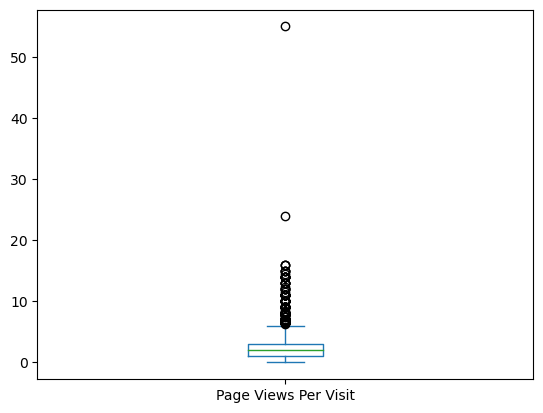

In [31]:
leads['Page Views Per Visit'].plot.box()
plt.show()

In [32]:
leads['Page Views Per Visit'].quantile([0.75,0.90,0.95,0.98,0.99,1])

0.75     3.0
0.90     5.0
0.95     6.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

In [33]:
leads = leads[leads['Page Views Per Visit']<=9.0]

In [34]:
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(np.median)

In [35]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.317146
Direct Traffic       0.280809
Olark Chat           0.194799
Organic Search       0.124014
Reference            0.049228
Welingak Website     0.014335
Referral Sites       0.013224
Facebook             0.003445
bing                 0.000667
google               0.000556
Click2call           0.000444
Social Media         0.000222
Live Chat            0.000222
youtubechannel       0.000111
Press_Release        0.000111
testone              0.000111
Pay per Click Ads    0.000111
welearnblog_Home     0.000111
WeLearn              0.000111
blog                 0.000111
NC_EDM               0.000111
Name: Lead Source, dtype: float64

In [36]:
leads['Lead Source'] = leads['Lead Source'].fillna('Google')

In [37]:
no_var = {}
for i in list(leads.columns):
    if len(leads[i].value_counts()) == 1:
        no_var[i] = 1
        
no_var

{'Magazine': 1,
 'Receive More Updates About Our Courses': 1,
 'Update me on Supply Chain Content': 1,
 'Get updates on DM Content': 1,
 'I agree to pay the amount through cheque': 1}

Above columns in no_vars show no variation hence we delete these columns

In [38]:
leads = leads.drop(columns = ['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Do Not Call','I agree to pay the amount through cheque'])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Incognito,02.Medium,02.Medium,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Quality_not_assigned,Incognito,02.Medium,02.Medium,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Mumbai,02.Medium,01.High,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,No,Modified


In [39]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9028 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9028 non-null   object 
 1   Lead Number                                    9028 non-null   int64  
 2   Lead Origin                                    9028 non-null   object 
 3   Lead Source                                    9028 non-null   object 
 4   Do Not Email                                   9028 non-null   object 
 5   Converted                                      9028 non-null   int64  
 6   TotalVisits                                    9028 non-null   float64
 7   Total Time Spent on Website                    9028 non-null   int64  
 8   Page Views Per Visit                           9028 non-null   float64
 9   Last Activity                                  9028 

In [40]:
len(leads[leads['Last Activity']==leads['Last Notable Activity']])/len(leads)

0.6413380593708462

### 64% data in two columns is same hence we drop one of the column

In [41]:
leads = leads.drop(columns = ['Last Notable Activity'])

In [42]:
boolean = {}
for i in list(leads.columns):
    if len(leads[i].value_counts()) == 2:
        boolean[i] = leads[i].value_counts().keys()
        
boolean

{'Do Not Email': Index(['No', 'Yes'], dtype='object'),
 'Converted': Int64Index([0, 1], dtype='int64'),
 'Search': Index(['No', 'Yes'], dtype='object'),
 'Newspaper Article': Index(['No', 'Yes'], dtype='object'),
 'X Education Forums': Index(['No', 'Yes'], dtype='object'),
 'Newspaper': Index(['No', 'Yes'], dtype='object'),
 'Digital Advertisement': Index(['No', 'Yes'], dtype='object'),
 'Through Recommendations': Index(['No', 'Yes'], dtype='object'),
 'A free copy of Mastering The Interview': Index(['No', 'Yes'], dtype='object')}

In [43]:
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['A free copy of Mastering The Interview'].value_counts())

No     9026
Yes       2
Name: Newspaper Article, dtype: int64
No     9027
Yes       1
Name: X Education Forums, dtype: int64
No     9027
Yes       1
Name: Newspaper, dtype: int64
No     9024
Yes       4
Name: Digital Advertisement, dtype: int64
No     9021
Yes       7
Name: Through Recommendations, dtype: int64
No     6184
Yes    2844
Name: A free copy of Mastering The Interview, dtype: int64


### Many of the columns do not show any variation hence we drop those columns

In [44]:
leads = leads.drop(columns=['Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'])

In [45]:
def bool_conv(x):
    if x == 'Yes':
        x=1
    else:
        x=0
    return x


In [46]:
leads['Do Not Email'] = leads['Do Not Email'].apply(bool_conv)
leads['Search'] = leads['Search'].apply(bool_conv)
leads['A free copy of Mastering The Interview'] = leads['A free copy of Mastering The Interview'].apply(bool_conv)

In [47]:
### Dropping 'Prospect Id' being irrelevent from model building point of view

leads = leads.drop(columns=['Prospect ID'])
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,0,Interested in other courses,Low in Relevance,Incognito,02.Medium,02.Medium,0
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,0,Ringing,Quality_not_assigned,Incognito,02.Medium,02.Medium,0
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,1
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,Ringing,Not Sure,Mumbai,02.Medium,01.High,0
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,0,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,0


In [48]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview'],
      dtype='object')

### Detecting and Treating outliers

In [49]:
leads['TotalVisits'].quantile([0.90,0.95,0.96,0.98,0.99,1])

0.90      7.00
0.95      9.00
0.96     10.00
0.98     13.00
0.99     16.73
1.00    251.00
Name: TotalVisits, dtype: float64

In [50]:
leads[leads['TotalVisits']>17]['TotalVisits'].value_counts()

18.0     15
20.0     11
19.0      9
21.0      6
23.0      5
25.0      5
27.0      5
24.0      4
22.0      3
28.0      2
115.0     1
26.0      1
32.0      1
251.0     1
29.0      1
54.0      1
41.0      1
141.0     1
43.0      1
42.0      1
Name: TotalVisits, dtype: int64

In [51]:
leads = leads[leads['TotalVisits']<=25]

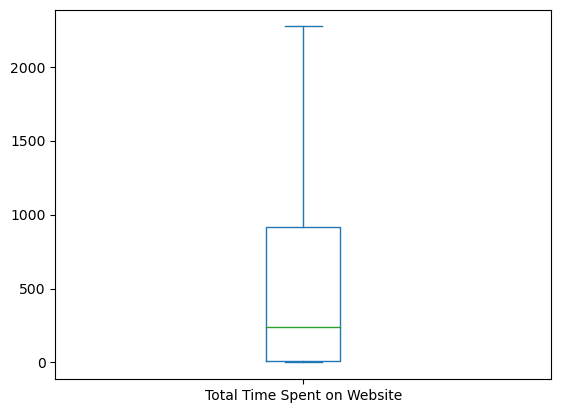

In [52]:
leads['Total Time Spent on Website'].plot.box()
plt.show()

In [53]:
leads['Last Activity'].value_counts()

Email Opened                    3405
SMS Sent                        2712
Olark Chat Conversation          968
Page Visited on Website          619
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               264
Form Submitted on Website        115
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          25
View in browser link Clicked       5
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

### Last activity can be categorized in three levels interested, not interested or Neutral

In [54]:
leads['What is your current occupation'].value_counts()

Unemployed              8103
Working Professional     672
Student                  205
Other                     15
Housewife                  9
Businessman                7
Name: What is your current occupation, dtype: int64

In [55]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9009
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Due to less Variation in column we drop the column 

In [56]:
leads = leads.drop(columns = ['What matters most to you in choosing a course'])

In [57]:
leads['Search'].value_counts()

0    8997
1      14
Name: Search, dtype: int64

In [58]:
leads['Lead Quality'].value_counts()

Quality_not_assigned    4687
Might be                1516
Not Sure                1072
Worst                    594
High in Relevance        590
Low in Relevance         552
Name: Lead Quality, dtype: int64

In [59]:
leads['City'].value_counts()

Incognito                      3584
Mumbai                         3142
Thane & Outskirts               729
Other Cities                    675
Other Cities of Maharashtra     439
Other Metro Cities              369
Tier II Cities                   73
Name: City, dtype: int64

In [60]:
leads['Asymmetrique Activity Index'].value_counts()

incognito    4130
02.Medium    3728
01.High       793
03.Low        360
Name: Asymmetrique Activity Index, dtype: int64

In [61]:
leads['Asymmetrique Profile Index'].value_counts()

incognito    4130
02.Medium    2722
01.High      2130
03.Low         29
Name: Asymmetrique Profile Index, dtype: int64

In [62]:
def cleaner(x):
    if '.' in x:
        lst = x.split('.')
        return lst[1]
    else:
        return x


In [63]:
leads['Asymmetrique Profile Index'] = leads['Asymmetrique Profile Index'].apply(cleaner)

In [64]:
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].apply(cleaner)

### Exploratory Data Analysis

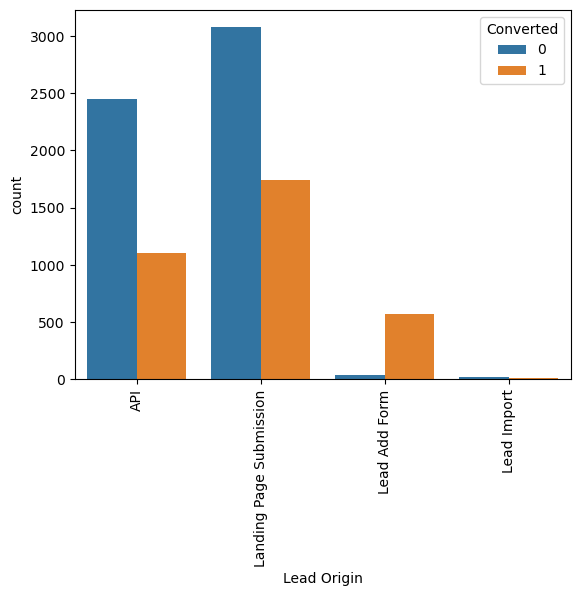

In [65]:
sns.countplot(data=leads,x='Lead Origin',hue='Converted')
plt.xticks(rotation=90)
plt.show()

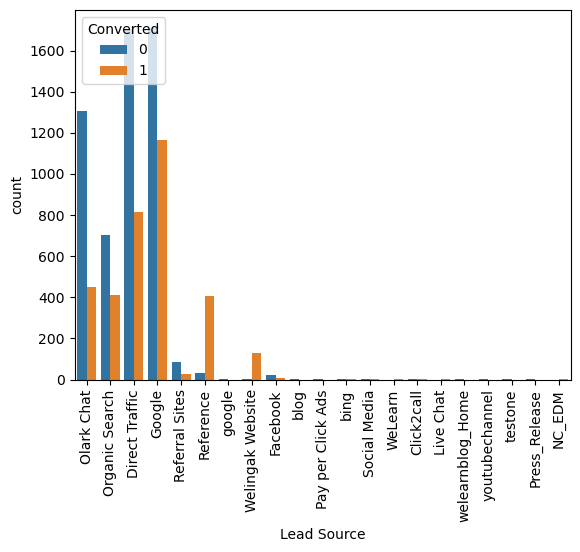

In [66]:
sns.countplot(data=leads,x='Lead Source',hue='Converted')
plt.xticks(rotation=90)
plt.show()

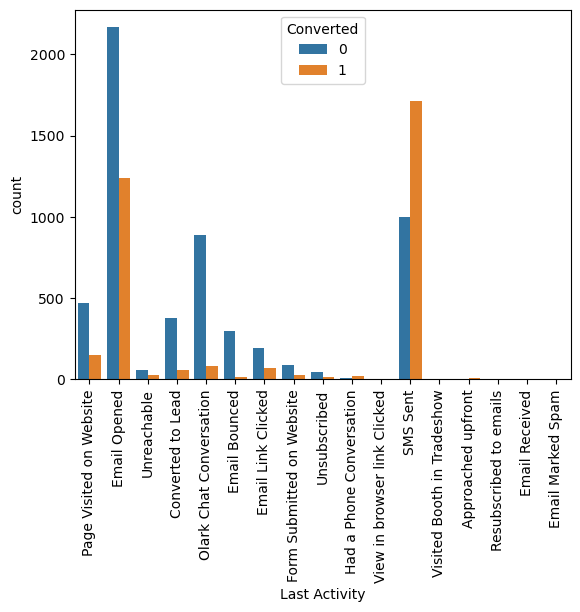

In [69]:
sns.countplot(data=leads,x='Last Activity',hue='Converted')
plt.xticks(rotation=90)
plt.show()

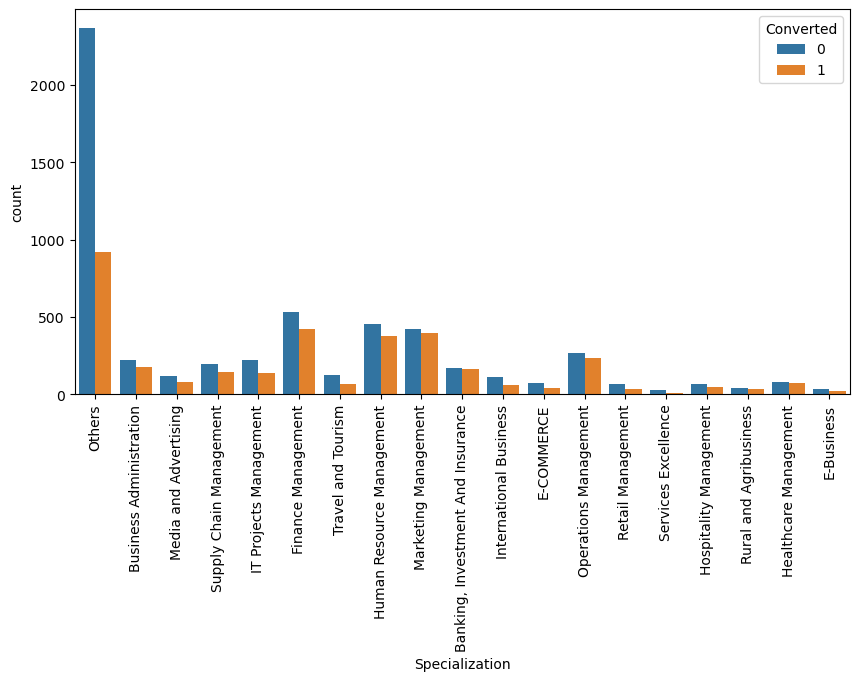

In [70]:
plt.figure(figsize=(10,5))
sns.countplot(data=leads,x='Specialization',hue='Converted')
plt.xticks(rotation=90)
plt.show()

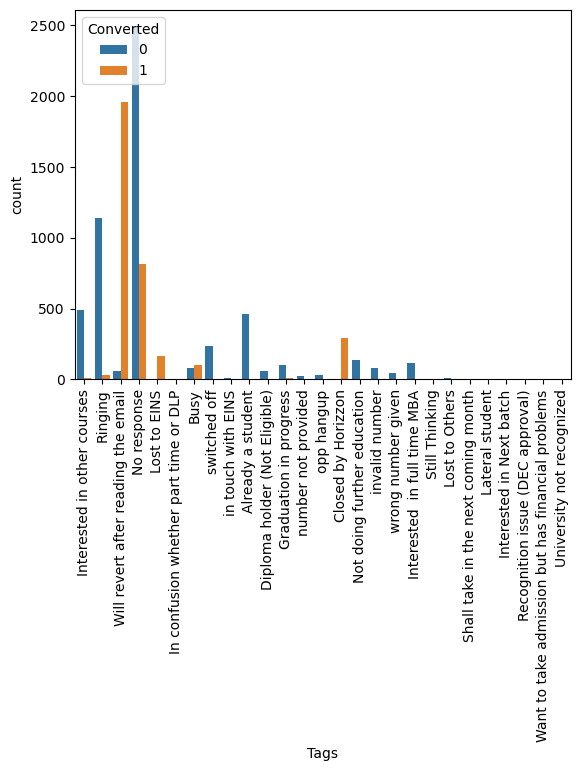

In [71]:
sns.countplot(data=leads,x='Tags',hue='Converted')
plt.xticks(rotation=90)
plt.show()

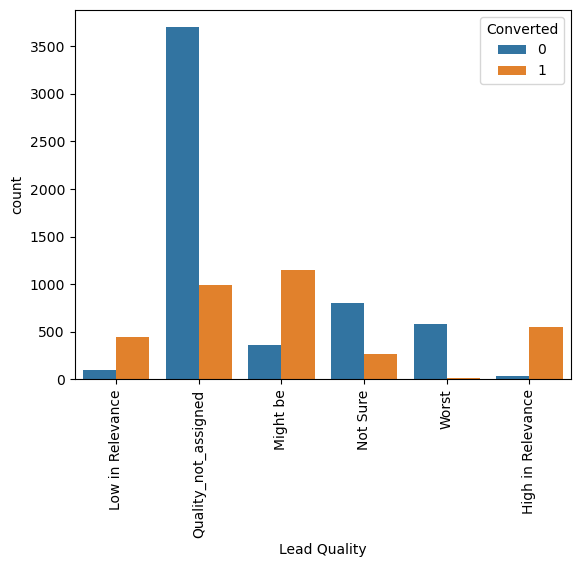

In [72]:
sns.countplot(data=leads,x='Lead Quality',hue='Converted')
plt.xticks(rotation=90)
plt.show()

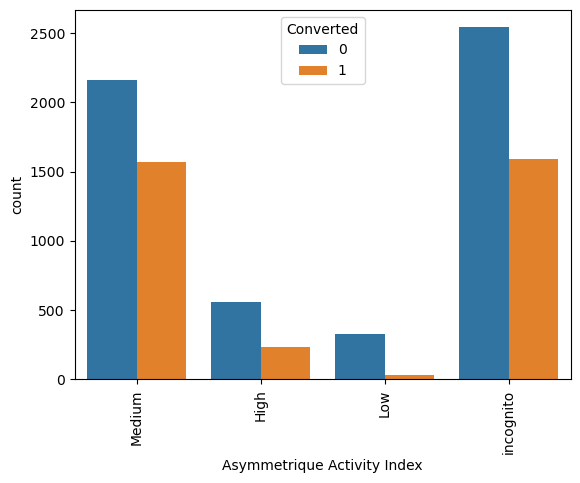

In [73]:
sns.countplot(data=leads,x='Asymmetrique Activity Index',hue='Converted')
plt.xticks(rotation=90)
plt.show()

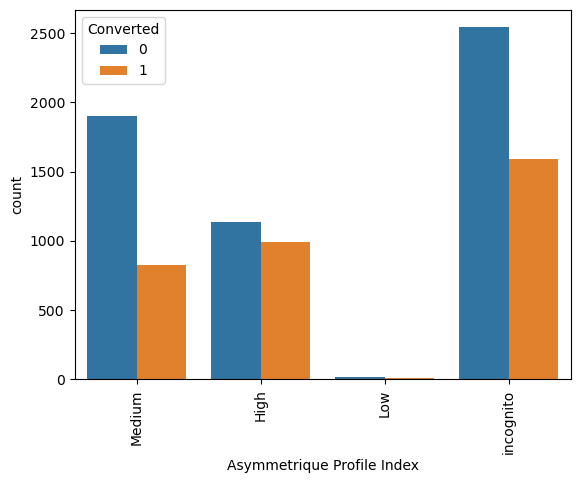

In [74]:
sns.countplot(data=leads,x='Asymmetrique Profile Index',hue='Converted')
plt.xticks(rotation=90)
plt.show()

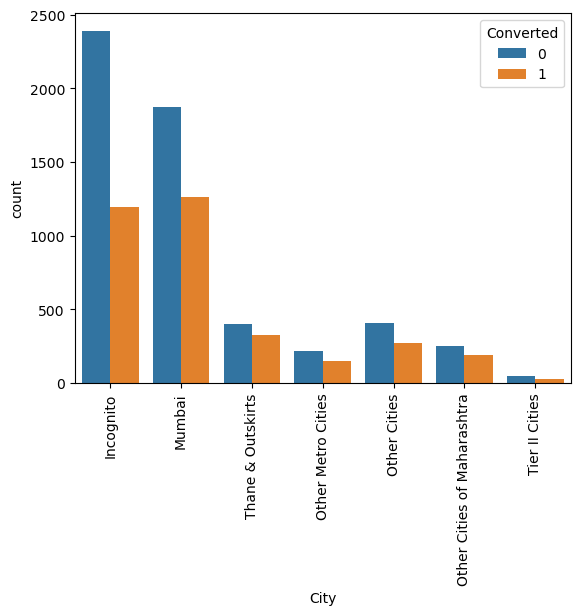

In [75]:
sns.countplot(data=leads,x='City',hue='Converted')
plt.xticks(rotation=90)
plt.show()

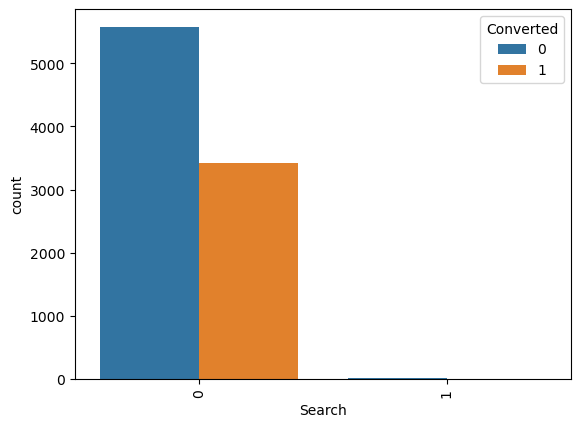

In [76]:
sns.countplot(data=leads,x='Search',hue='Converted')
plt.xticks(rotation=90)
plt.show()

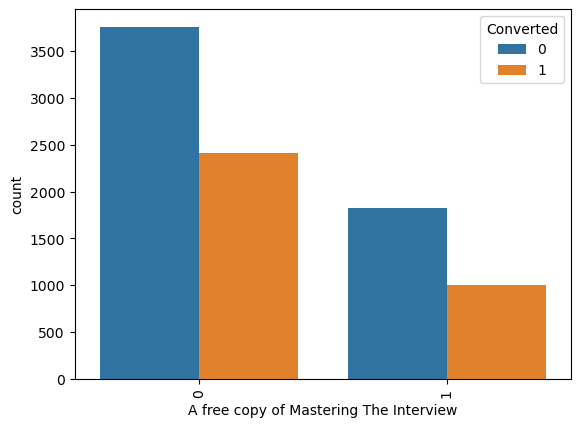

In [77]:
sns.countplot(data=leads,x='A free copy of Mastering The Interview',hue='Converted')
plt.xticks(rotation=90)
plt.show()

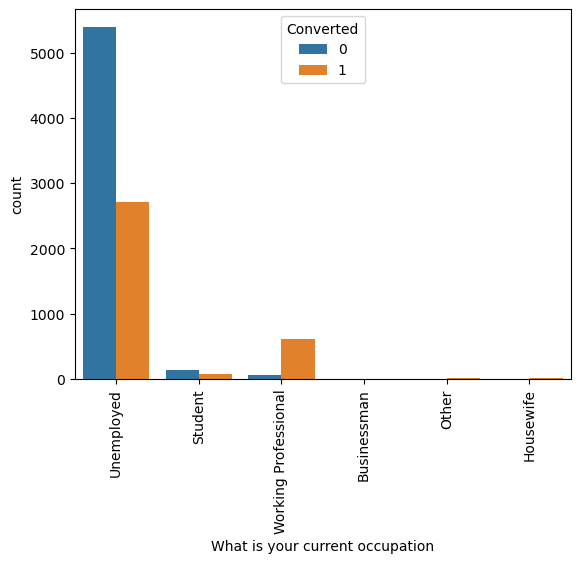

In [78]:
sns.countplot(data=leads,x='What is your current occupation',hue='Converted')
plt.xticks(rotation=90)
plt.show()

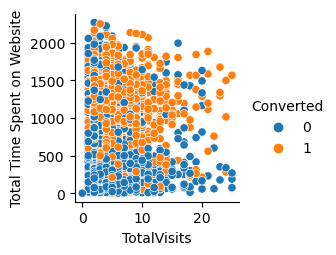

In [79]:
sns.pairplot(data=leads,x_vars='TotalVisits',y_vars='Total Time Spent on Website',hue='Converted')
plt.show()

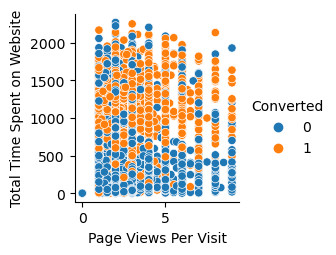

In [80]:
sns.pairplot(data=leads,x_vars='Page Views Per Visit',y_vars='Total Time Spent on Website',hue='Converted')
plt.show()

### More time spend , more pages watched correspond to hot leads

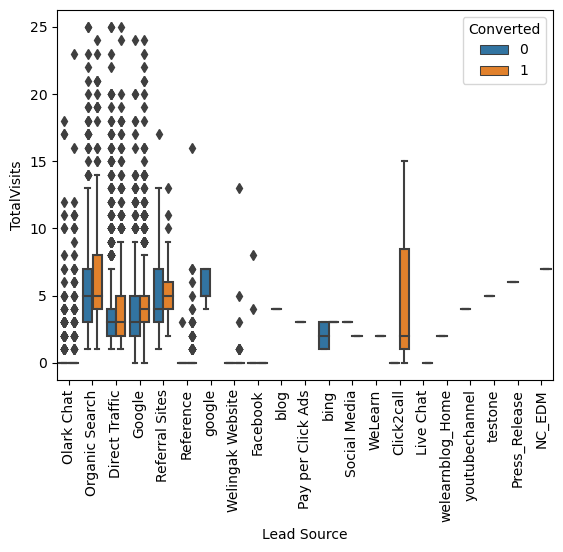

In [81]:
sns.boxplot(data=leads,x='Lead Source',y='TotalVisits',hue='Converted')
plt.xticks(rotation=90)
plt.show()

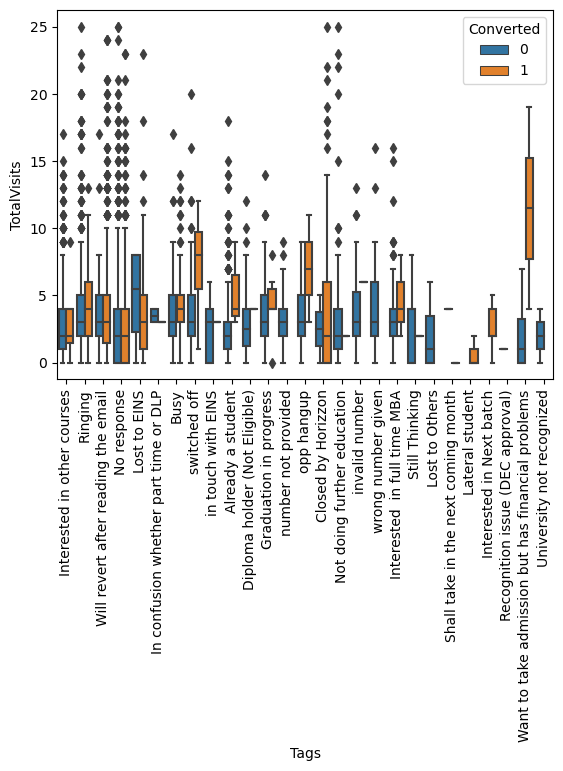

In [82]:
sns.boxplot(data=leads,x='Tags',y='TotalVisits',hue='Converted')
plt.xticks(rotation=90)
plt.show()

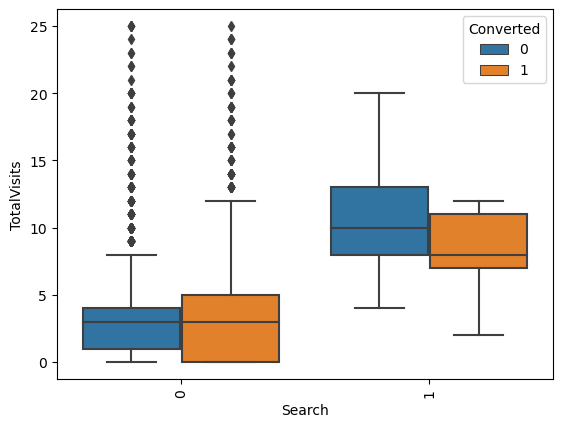

In [83]:
sns.boxplot(data=leads,x='Search',y='TotalVisits',hue='Converted')
plt.xticks(rotation=90)
plt.show()

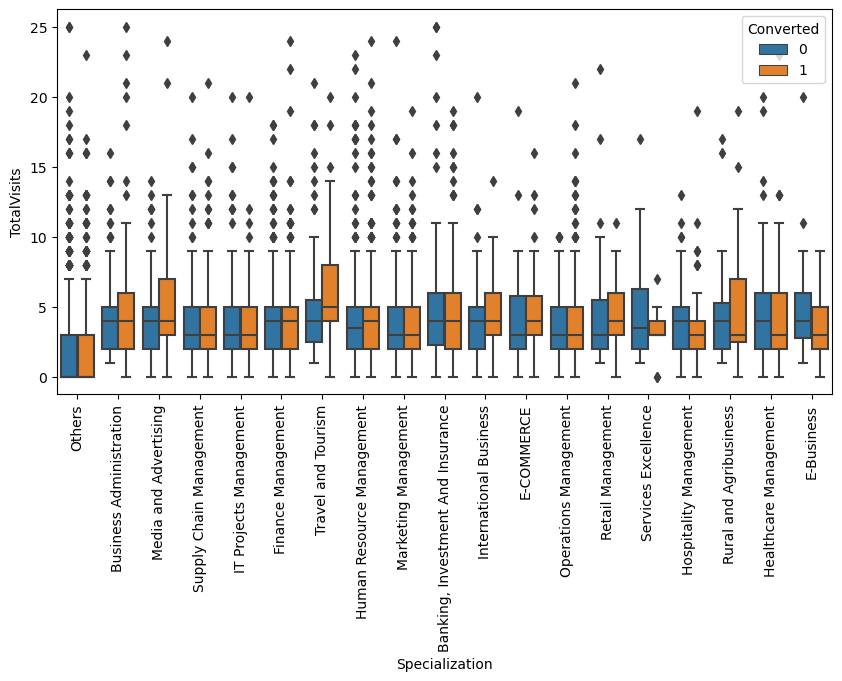

In [84]:
plt.figure(figsize=(10,5))
sns.boxplot(data=leads,x='Specialization',y='TotalVisits',hue='Converted')
plt.xticks(rotation=90)
plt.show()

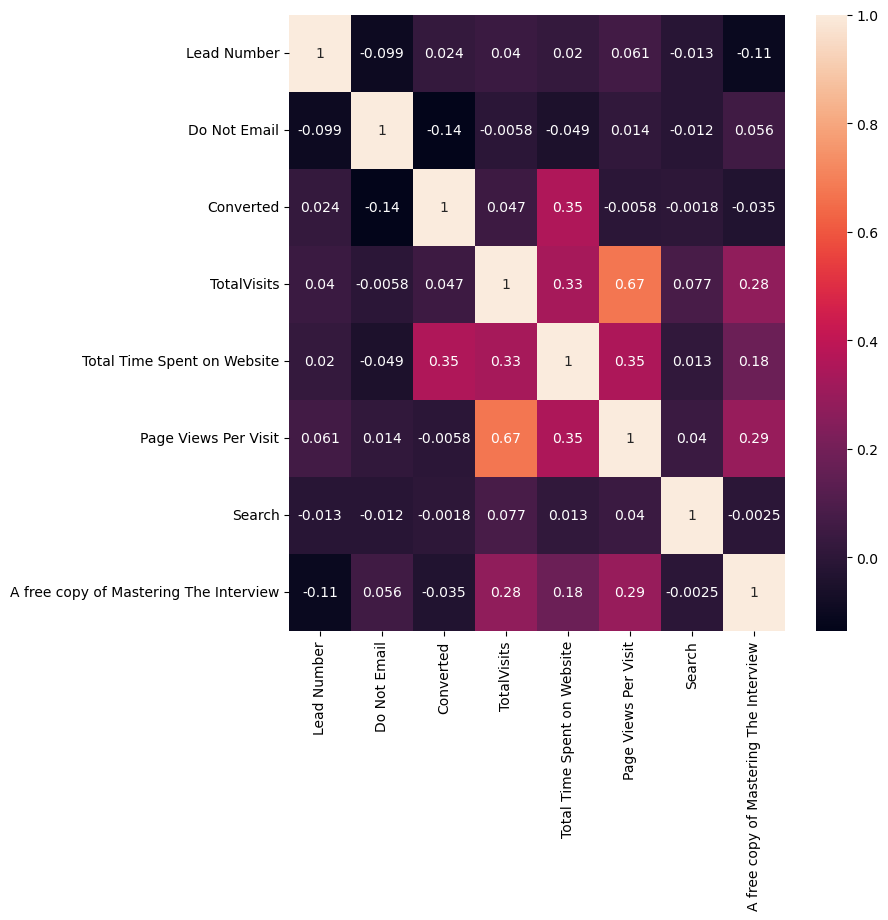

In [85]:
plt.figure(figsize=(8,8))
sns.heatmap(leads.corr(),cbar = 'RdYlGn',annot=True)
plt.show()

### Preprocessing 

In [86]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview'],
      dtype='object')

In [87]:
Lead_origin = pd.get_dummies(leads['Lead Origin'],prefix='origin',drop_first=True)

lead_source = pd.get_dummies(leads['Lead Source'],prefix='Source',drop_first=True)

last_act = pd.get_dummies(leads['Last Activity'],prefix='last_act',drop_first=True)

country = pd.get_dummies(leads['Country'],prefix='con',drop_first=True)

Specialization = pd.get_dummies(leads['Specialization'],prefix='spec',drop_first=True)

Occupation = pd.get_dummies(leads['What is your current occupation'],prefix='Occu',drop_first=True)

tags_df = pd.get_dummies(leads['Tags'],prefix='tags',drop_first=True)

lead_quality_df = pd.get_dummies(leads['Lead Quality'],prefix='Quality',drop_first=True)

City_df = pd.get_dummies(leads['City'],prefix='city',drop_first=True)

activity = pd.get_dummies(leads['Asymmetrique Activity Index'],prefix='activity',drop_first=True)

profile = pd.get_dummies(leads['Asymmetrique Profile Index'],prefix='prof',drop_first=True)

In [88]:
df_leads = pd.concat([leads,Lead_origin,lead_source,last_act,country,Specialization,Occupation,tags_df,lead_quality_df,City_df,activity,profile],axis=1)

In [89]:
leads_df = df_leads.drop(columns=['Lead Origin','Lead Source','Last Activity','Country','Specialization','What is your current occupation','Tags','Lead Quality','City','Asymmetrique Activity Index','Asymmetrique Profile Index'])
leads_df.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,origin_Landing Page Submission,origin_Lead Add Form,origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,Source_NC_EDM,Source_Olark Chat,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_blog,Source_google,Source_testone,Source_welearnblog_Home,Source_youtubechannel,last_act_Converted to Lead,last_act_Email Bounced,last_act_Email Link Clicked,last_act_Email Marked Spam,last_act_Email Opened,last_act_Email Received,last_act_Form Submitted on Website,last_act_Had a Phone Conversation,last_act_Olark Chat Conversation,last_act_Page Visited on Website,last_act_Resubscribed to emails,last_act_SMS Sent,last_act_Unreachable,last_act_Unsubscribed,last_act_View in browser link Clicked,last_act_Visited Booth in Tradeshow,con_Australia,con_Bahrain,con_Bangladesh,con_Belgium,con_Canada,con_China,con_Denmark,con_France,con_Germany,con_Ghana,con_Hong Kong,con_India,con_Indonesia,con_Italy,con_Kenya,con_Kuwait,con_Liberia,con_Malaysia,con_Netherlands,con_Nigeria,con_Oman,con_Philippines,con_Qatar,con_Russia,con_Saudi Arabia,con_Singapore,con_South Africa,con_Sri Lanka,con_Sweden,con_Switzerland,con_Tanzania,con_Uganda,con_United Arab Emirates,con_United Kingdom,con_United States,con_Vietnam,con_unknown,spec_Business Administration,spec_E-Business,spec_E-COMMERCE,spec_Finance Management,spec_Healthcare Management,spec_Hospitality Management,spec_Human Resource Management,spec_IT Projects Management,spec_International Business,spec_Marketing Management,spec_Media and Advertising,spec_Operations Management,spec_Others,spec_Retail Management,spec_Rural and Agribusiness,spec_Services Excellence,spec_Supply Chain Management,spec_Travel and Tourism,Occu_Housewife,Occu_Other,Occu_Student,Occu_Unemployed,Occu_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_No response,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,Quality_Low in Relevance,Quality_Might be,Quality_Not Sure,Quality_Quality_not_assigned,Quality_Worst,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,activity_Low,activity_Medium,activity_incognito,prof_Low,prof_Medium,prof_incognito
0,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,660727,0,1,2.0,1532,2.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0

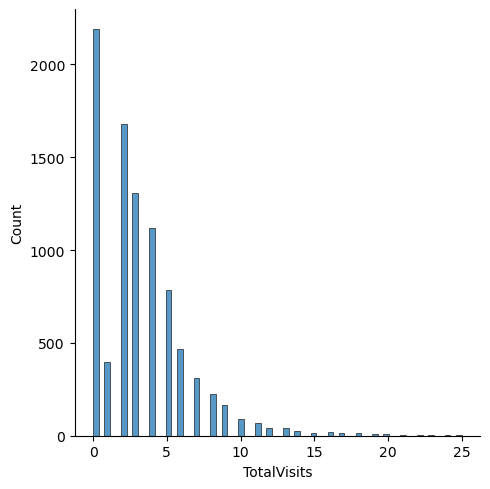

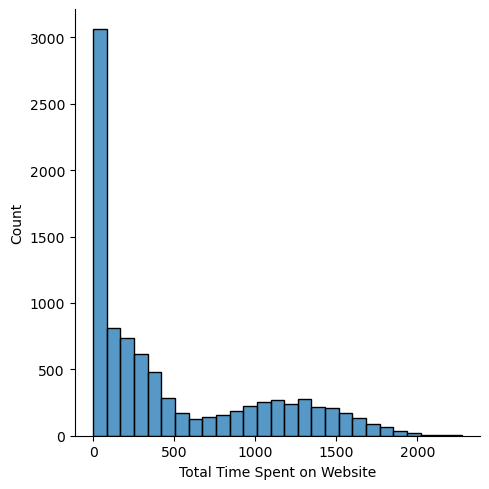

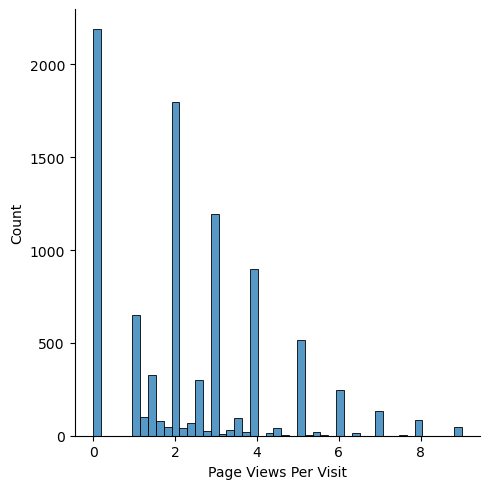

In [96]:
sns.displot(leads_df['TotalVisits'])

sns.displot(leads_df['Total Time Spent on Website'])

sns.displot(leads_df['Page Views Per Visit'])

In [97]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [98]:
dataframe = leads_df.drop(columns=['Lead Number'])
dataframe.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,origin_Landing Page Submission,origin_Lead Add Form,origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,Source_NC_EDM,Source_Olark Chat,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_blog,Source_google,Source_testone,Source_welearnblog_Home,Source_youtubechannel,last_act_Converted to Lead,last_act_Email Bounced,last_act_Email Link Clicked,last_act_Email Marked Spam,last_act_Email Opened,last_act_Email Received,last_act_Form Submitted on Website,last_act_Had a Phone Conversation,last_act_Olark Chat Conversation,last_act_Page Visited on Website,last_act_Resubscribed to emails,last_act_SMS Sent,last_act_Unreachable,last_act_Unsubscribed,last_act_View in browser link Clicked,last_act_Visited Booth in Tradeshow,con_Australia,con_Bahrain,con_Bangladesh,con_Belgium,con_Canada,con_China,con_Denmark,con_France,con_Germany,con_Ghana,con_Hong Kong,con_India,con_Indonesia,con_Italy,con_Kenya,con_Kuwait,con_Liberia,con_Malaysia,con_Netherlands,con_Nigeria,con_Oman,con_Philippines,con_Qatar,con_Russia,con_Saudi Arabia,con_Singapore,con_South Africa,con_Sri Lanka,con_Sweden,con_Switzerland,con_Tanzania,con_Uganda,con_United Arab Emirates,con_United Kingdom,con_United States,con_Vietnam,con_unknown,spec_Business Administration,spec_E-Business,spec_E-COMMERCE,spec_Finance Management,spec_Healthcare Management,spec_Hospitality Management,spec_Human Resource Management,spec_IT Projects Management,spec_International Business,spec_Marketing Management,spec_Media and Advertising,spec_Operations Management,spec_Others,spec_Retail Management,spec_Rural and Agribusiness,spec_Services Excellence,spec_Supply Chain Management,spec_Travel and Tourism,Occu_Housewife,Occu_Other,Occu_Student,Occu_Unemployed,Occu_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_No response,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,Quality_Low in Relevance,Quality_Might be,Quality_Not Sure,Quality_Quality_not_assigned,Quality_Worst,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,activity_Low,activity_Medium,activity_incognito,prof_Low,prof_Medium,prof_incognito
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,2.0,1532,2.0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,1.0,305,1.0,0,

In [144]:
len(list(dataframe.columns))

149

In [99]:
leads_train, leads_test = train_test_split(dataframe,train_size=0.7,random_state=50)
print(leads_train.shape)
print(leads_test.shape)

(6307, 149)
(2704, 149)


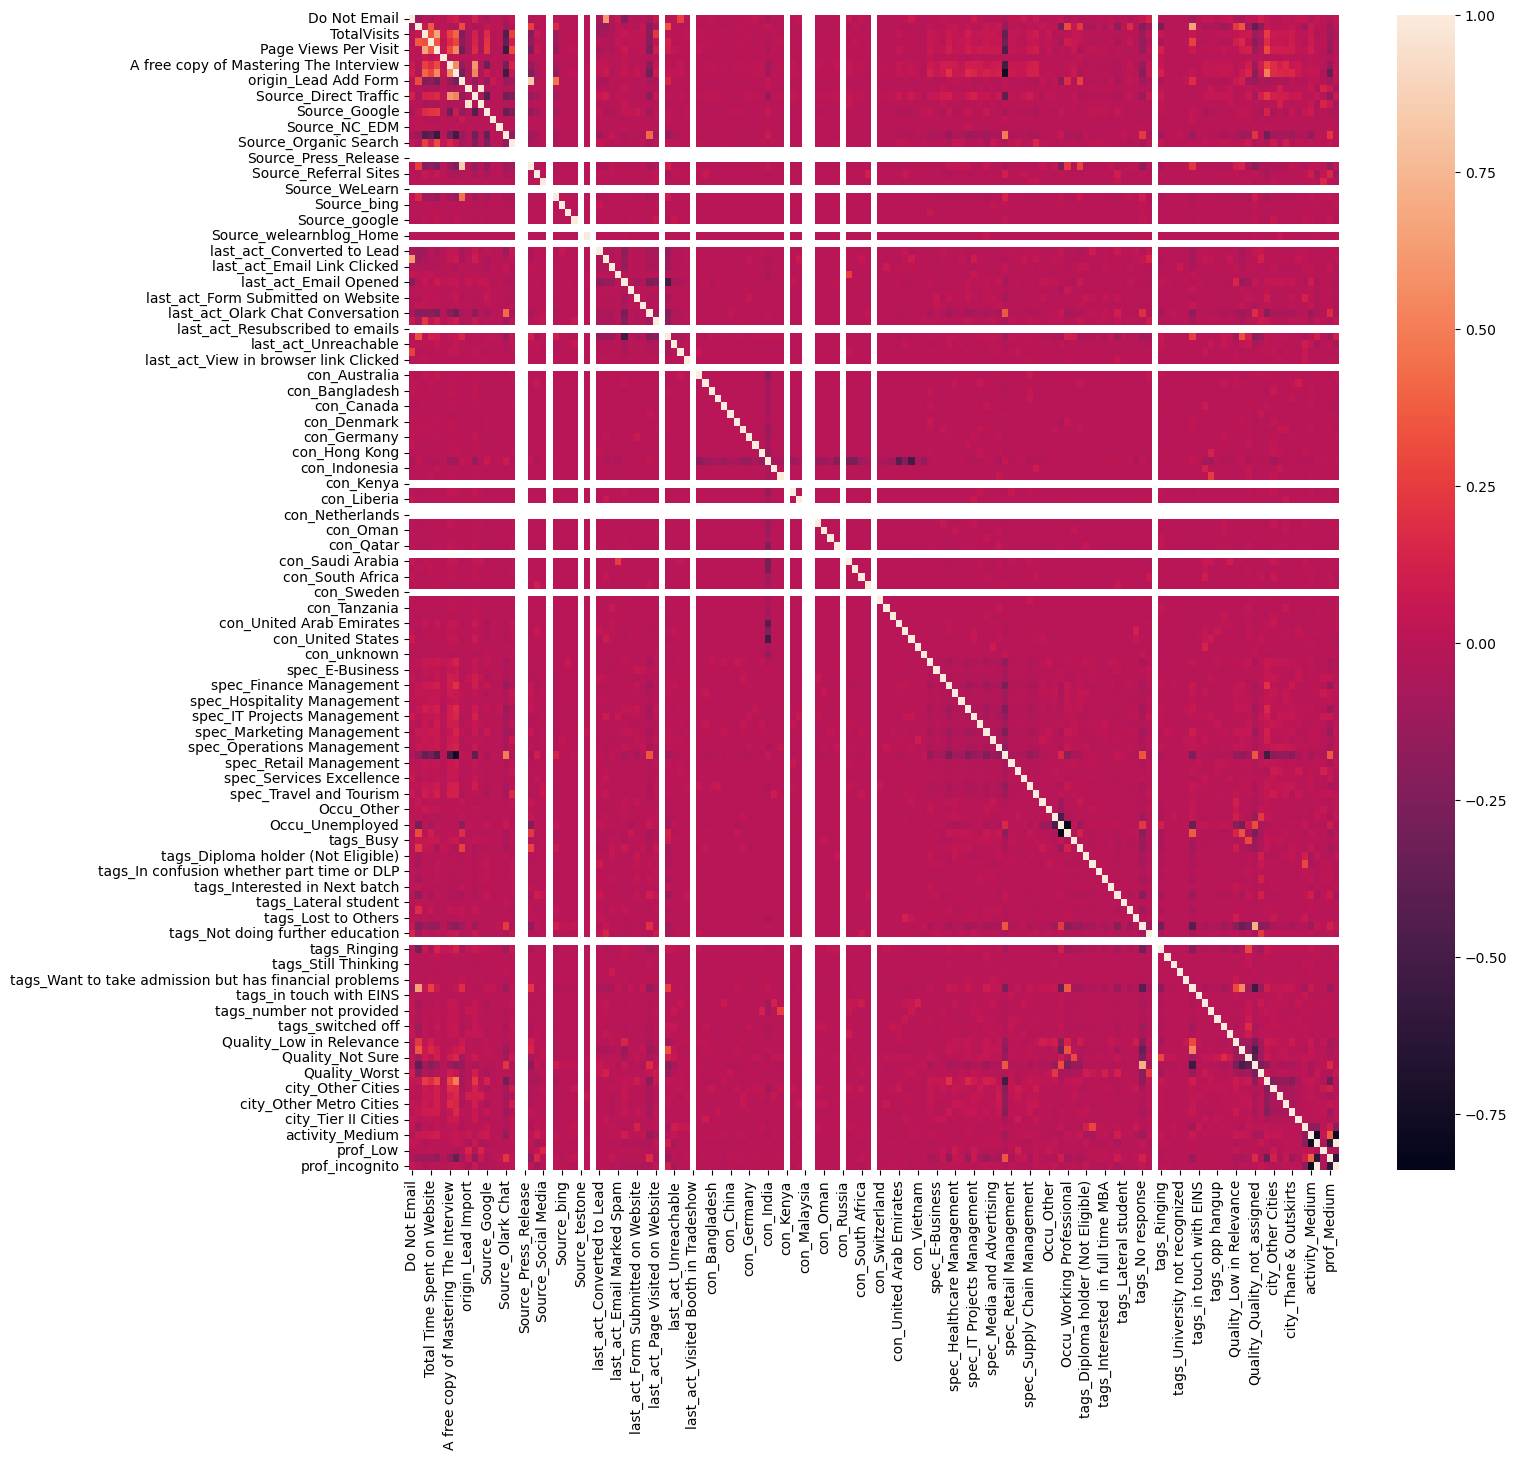

In [100]:
plt.figure(figsize=(15,15))
sns.heatmap(leads_train.corr(),cbar='RdYlGn')
plt.show()

### Model Preparation on train_set

In [101]:
y = leads_train['Converted']
X = leads_train.drop(columns=['Converted'])

In [102]:
scaler = MinMaxScaler()

X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,origin_Landing Page Submission,origin_Lead Add Form,origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,Source_NC_EDM,Source_Olark Chat,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_blog,Source_google,Source_testone,Source_welearnblog_Home,Source_youtubechannel,last_act_Converted to Lead,last_act_Email Bounced,last_act_Email Link Clicked,last_act_Email Marked Spam,last_act_Email Opened,last_act_Email Received,last_act_Form Submitted on Website,last_act_Had a Phone Conversation,last_act_Olark Chat Conversation,last_act_Page Visited on Website,last_act_Resubscribed to emails,last_act_SMS Sent,last_act_Unreachable,last_act_Unsubscribed,last_act_View in browser link Clicked,last_act_Visited Booth in Tradeshow,con_Australia,con_Bahrain,con_Bangladesh,con_Belgium,con_Canada,con_China,con_Denmark,con_France,con_Germany,con_Ghana,con_Hong Kong,con_India,con_Indonesia,con_Italy,con_Kenya,con_Kuwait,con_Liberia,con_Malaysia,con_Netherlands,con_Nigeria,con_Oman,con_Philippines,con_Qatar,con_Russia,con_Saudi Arabia,con_Singapore,con_South Africa,con_Sri Lanka,con_Sweden,con_Switzerland,con_Tanzania,con_Uganda,con_United Arab Emirates,con_United Kingdom,con_United States,con_Vietnam,con_unknown,spec_Business Administration,spec_E-Business,spec_E-COMMERCE,spec_Finance Management,spec_Healthcare Management,spec_Hospitality Management,spec_Human Resource Management,spec_IT Projects Management,spec_International Business,spec_Marketing Management,spec_Media and Advertising,spec_Operations Management,spec_Others,spec_Retail Management,spec_Rural and Agribusiness,spec_Services Excellence,spec_Supply Chain Management,spec_Travel and Tourism,Occu_Housewife,Occu_Other,Occu_Student,Occu_Unemployed,Occu_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_No response,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,Quality_Low in Relevance,Quality_Might be,Quality_Not Sure,Quality_Quality_not_assigned,Quality_Worst,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,activity_Low,activity_Medium,activity_incognito,prof_Low,prof_Medium,prof_incognito
count,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.0,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.00000,6307.000000,6307.000000,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.000000,6307.0,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.0,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.000000,6307.0

In [106]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,origin_Landing Page Submission,origin_Lead Add Form,origin_Lead Import,Source_Direct Traffic,Source_Facebook,Source_Google,Source_Live Chat,Source_NC_EDM,Source_Olark Chat,Source_Organic Search,Source_Pay per Click Ads,Source_Press_Release,Source_Reference,Source_Referral Sites,Source_Social Media,Source_WeLearn,Source_Welingak Website,Source_bing,Source_blog,Source_google,Source_testone,Source_welearnblog_Home,Source_youtubechannel,last_act_Converted to Lead,last_act_Email Bounced,last_act_Email Link Clicked,last_act_Email Marked Spam,last_act_Email Opened,last_act_Email Received,last_act_Form Submitted on Website,last_act_Had a Phone Conversation,last_act_Olark Chat Conversation,last_act_Page Visited on Website,last_act_Resubscribed to emails,last_act_SMS Sent,last_act_Unreachable,last_act_Unsubscribed,last_act_View in browser link Clicked,last_act_Visited Booth in Tradeshow,con_Australia,con_Bahrain,con_Bangladesh,con_Belgium,con_Canada,con_China,con_Denmark,con_France,con_Germany,con_Ghana,con_Hong Kong,con_India,con_Indonesia,con_Italy,con_Kenya,con_Kuwait,con_Liberia,con_Malaysia,con_Netherlands,con_Nigeria,con_Oman,con_Philippines,con_Qatar,con_Russia,con_Saudi Arabia,con_Singapore,con_South Africa,con_Sri Lanka,con_Sweden,con_Switzerland,con_Tanzania,con_Uganda,con_United Arab Emirates,con_United Kingdom,con_United States,con_Vietnam,con_unknown,spec_Business Administration,spec_E-Business,spec_E-COMMERCE,spec_Finance Management,spec_Healthcare Management,spec_Hospitality Management,spec_Human Resource Management,spec_IT Projects Management,spec_International Business,spec_Marketing Management,spec_Media and Advertising,spec_Operations Management,spec_Others,spec_Retail Management,spec_Rural and Agribusiness,spec_Services Excellence,spec_Supply Chain Management,spec_Travel and Tourism,Occu_Housewife,Occu_Other,Occu_Student,Occu_Unemployed,Occu_Working Professional,tags_Busy,tags_Closed by Horizzon,tags_Diploma holder (Not Eligible),tags_Graduation in progress,tags_In confusion whether part time or DLP,tags_Interested in full time MBA,tags_Interested in Next batch,tags_Interested in other courses,tags_Lateral student,tags_Lost to EINS,tags_Lost to Others,tags_No response,tags_Not doing further education,tags_Recognition issue (DEC approval),tags_Ringing,tags_Shall take in the next coming month,tags_Still Thinking,tags_University not recognized,tags_Want to take admission but has financial problems,tags_Will revert after reading the email,tags_in touch with EINS,tags_invalid number,tags_number not provided,tags_opp hangup,tags_switched off,tags_wrong number given,Quality_Low in Relevance,Quality_Might be,Quality_Not Sure,Quality_Quality_not_assigned,Quality_Worst,city_Mumbai,city_Other Cities,city_Other Cities of Maharashtra,city_Other Metro Cities,city_Thane & Outskirts,city_Tier II Cities,activity_Low,activity_Medium,activity_incognito,prof_Low,prof_Medium,prof_incognito
1568,0,0.00,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8620,0,0.08,0.493838,0.111111,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7480,0,0.00,0.000000,0.000000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0

In [107]:
from sklearn.feature_selection import RFE

In [108]:
logreg = LogisticRegression(max_iter=200,random_state=50)

rfe = RFE(logreg,n_features_to_select=30)
rfe = rfe.fit(X,y)

In [109]:
list(zip(X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 67),
 ('A free copy of Mastering The Interview', False, 44),
 ('origin_Landing Page Submission', True, 1),
 ('origin_Lead Add Form', True, 1),
 ('origin_Lead Import', False, 48),
 ('Source_Direct Traffic', False, 42),
 ('Source_Facebook', False, 24),
 ('Source_Google', False, 43),
 ('Source_Live Chat', False, 99),
 ('Source_NC_EDM', False, 5),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 41),
 ('Source_Pay per Click Ads', False, 118),
 ('Source_Press_Release', False, 117),
 ('Source_Reference', False, 12),
 ('Source_Referral Sites', False, 40),
 ('Source_Social Media', False, 70),
 ('Source_WeLearn', False, 111),
 ('Source_Welingak Website', True, 1),
 ('Source_bing', False, 65),
 ('Source_blog', False, 54),
 ('Source_google', False, 39),
 ('Source_testone', False, 115),
 ('Source_welearnblog_Home', False, 69),
 (

In [110]:
col = X.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'origin_Landing Page Submission',
       'origin_Lead Add Form', 'Source_Olark Chat', 'Source_Welingak Website',
       'last_act_Converted to Lead', 'last_act_Olark Chat Conversation',
       'last_act_SMS Sent', 'con_Germany', 'con_Saudi Arabia', 'tags_Busy',
       'tags_Closed by Horizzon', 'tags_Interested in Next batch',
       'tags_Interested in other courses', 'tags_Lost to EINS',
       'tags_No response', 'tags_Not doing further education', 'tags_Ringing',
       'tags_Will revert after reading the email', 'tags_in touch with EINS',
       'tags_invalid number', 'tags_number not provided', 'tags_switched off',
       'tags_wrong number given', 'Quality_Quality_not_assigned',
       'Quality_Worst', 'activity_Low'],
      dtype='object')

In [111]:
X_sm = sm.add_constant(X[col])
model1 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6276
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1192.0
Date:                Fri, 24 Feb 2023   Deviance:                       2383.9
Time:                        15:29:23   Pearson chi2:                 9.56e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6120
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3712      0.356     -9.470      0.000      -4.069      -2.673
Do Not Email                                -1.1315      0.238     -4.746      0.000      -1.599      -0.664
TotalVisits                                  1.8558      0.546      3.400      0.001       0.786       2.926
Total Time Spent on Website                  4.5780      0.257     17.800      0.000       4.074       5.082
Page Views Per Visit                        -0.9053      0.428     -2.117      0.034      -1.744      -0.067
origin_Landing Page Submission              -0.8995      0.143     -6.285      0.000      -1.180      -0.619
origin_Lead Add Form                         1.7694      0.469      3.775      0.000       0.851       2.688
Source_Olark Chat                            0.9650      0.195      4.956      0.000       0.583       1.347
Source_Welingak Website                      4.1620      1.104      3.770      0.000       1.998       6.326
last_act_Converted to Lead                  -1.3601      0.357     -3.807      0.000      -2.060      -0.660
last_act_Olark Chat Conversation            -1.7678      0.237     -7.456      0.000      -2.233      -1.303
last_act_SMS Sent                            1.8852      0.121     15.523      0.000       1.647       2.123
con_Germany                                  2.8172      1.271      2.217      0.027       0.327       5.308
con_Saudi Arabia                            -2.1629      1.191     -1.817      0.069      -4.496       0.171
tags_Busy                                    2.2836      0.384      5.946      0.000       1.531       3.036
tags_Closed by Horizzon                      7.3232      0.787      9.300      0.000       5.780       8.867
tags_Interested in Next batch               25.7645    1.2e+05      0.000      1.000   -2.34e+05    2.34e+05
tags_Interested in other courses            -1.0544      0.525     -2.010      0.044      -2.083      -0.026
tags_Lost to EINS                            8.1162      0.827      9.820      0.000       6.496       9.736
tags_No response                             1.9216      0.351      5.477      0.000       1.234       2.609
tags_Not doing further education           -21.5062   1.87e+04     -0.001      0.999   -3.67e+04    3.66e+04
tags_Ringing                                -1.8379      0.384     -4.781      0.000      -2.591      -1.084
tags_Will revert after reading the email     5.7146      0.350     16.350      0.000       5.030       6.400
tags_in touch with EINS                      2.5528      1.074      2.376      0.017       0.447       4.659
tags_invalid number                        -22.4852   2.33e+04     -0.001      0.999   -4.57e+04    4.56e+04
tags_number not provided       

In [112]:
col2 = [x for x in col if x != 'tags_Not doing further education']
X_sm = sm.add_constant(X[col2])
model2 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1193.8
Date:                Fri, 24 Feb 2023   Deviance:                       2387.7
Time:                        15:31:04   Pearson chi2:                 9.55e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6118
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.5184      0.352    -10.003      0.000      -4.208      -2.829
Do Not Email                                -1.1351      0.238     -4.773      0.000      -1.601      -0.669
TotalVisits                                  1.8383      0.540      3.405      0.001       0.780       2.896
Total Time Spent on Website                  4.5819      0.257     17.834      0.000       4.078       5.085
Page Views Per Visit                        -0.8914      0.427     -2.088      0.037      -1.728      -0.055
origin_Landing Page Submission              -0.8977      0.143     -6.277      0.000      -1.178      -0.617
origin_Lead Add Form                         1.7566      0.465      3.779      0.000       0.845       2.668
Source_Olark Chat                            0.9724      0.195      4.988      0.000       0.590       1.355
Source_Welingak Website                      4.1809      1.102      3.793      0.000       2.020       6.341
last_act_Converted to Lead                  -1.3575      0.357     -3.798      0.000      -2.058      -0.657
last_act_Olark Chat Conversation            -1.7629      0.237     -7.432      0.000      -2.228      -1.298
last_act_SMS Sent                            1.8908      0.121     15.568      0.000       1.653       2.129
con_Germany                                  2.8210      1.271      2.220      0.026       0.330       5.312
con_Saudi Arabia                            -2.1628      1.190     -1.818      0.069      -4.495       0.169
tags_Busy                                    2.4221      0.381      6.356      0.000       1.675       3.169
tags_Closed by Horizzon                      7.4616      0.786      9.494      0.000       5.921       9.002
tags_Interested in Next batch               25.9095    1.2e+05      0.000      1.000   -2.34e+05    2.34e+05
tags_Interested in other courses            -0.9188      0.523     -1.757      0.079      -1.944       0.106
tags_Lost to EINS                            8.2454      0.826      9.982      0.000       6.626       9.864
tags_No response                             2.0470      0.350      5.851      0.000       1.361       2.733
tags_Ringing                                -1.7031      0.382     -4.459      0.000      -2.452      -0.955
tags_Will revert after reading the email     5.8547      0.346     16.913      0.000       5.176       6.533
tags_in touch with EINS                      2.6914      1.073      2.508      0.012       0.588       4.795
tags_invalid number                        -22.3523   2.33e+04     -0.001      0.999   -4.57e+04    4.56e+04
tags_number not provided                   -23.5197   4.46e+04     -0.001      1.000   -8.74e+04    8.74e+04
tags_switched off              

In [113]:
col3 = [x for x in col2 if x != 'tags_Interested in Next batch']
X_sm = sm.add_constant(X[col3])
model3 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1196.2
Date:                Fri, 24 Feb 2023   Deviance:                       2392.3
Time:                        15:32:21   Pearson chi2:                 9.79e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6115
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3861      0.336    -10.076      0.000      -4.045      -2.727
Do Not Email                                -1.1050      0.235     -4.697      0.000      -1.566      -0.644
TotalVisits                                  1.8341      0.539      3.403      0.001       0.778       2.891
Total Time Spent on Website                  4.5839      0.257     17.861      0.000       4.081       5.087
Page Views Per Visit                        -0.9063      0.427     -2.124      0.034      -1.743      -0.070
origin_Landing Page Submission              -0.9114      0.143     -6.386      0.000      -1.191      -0.632
origin_Lead Add Form                         1.8024      0.457      3.946      0.000       0.907       2.698
Source_Olark Chat                            0.9601      0.195      4.932      0.000       0.579       1.342
Source_Welingak Website                      4.1208      1.099      3.749      0.000       1.966       6.275
last_act_Converted to Lead                  -1.3551      0.357     -3.794      0.000      -2.055      -0.655
last_act_Olark Chat Conversation            -1.7636      0.237     -7.434      0.000      -2.229      -1.299
last_act_SMS Sent                            1.9030      0.121     15.685      0.000       1.665       2.141
con_Germany                                  2.8252      1.271      2.223      0.026       0.334       5.316
con_Saudi Arabia                            -2.1631      1.191     -1.816      0.069      -4.498       0.172
tags_Busy                                    2.3012      0.368      6.250      0.000       1.580       3.023
tags_Closed by Horizzon                      7.3514      0.780      9.422      0.000       5.822       8.881
tags_Interested in other courses            -1.0370      0.515     -2.015      0.044      -2.046      -0.028
tags_Lost to EINS                            8.1712      0.824      9.915      0.000       6.556       9.787
tags_No response                             1.9534      0.338      5.781      0.000       1.291       2.616
tags_Ringing                                -1.8266      0.369     -4.952      0.000      -2.549      -1.104
tags_Will revert after reading the email     5.7370      0.332     17.288      0.000       5.087       6.387
tags_in touch with EINS                      2.5747      1.072      2.403      0.016       0.474       4.675
tags_invalid number                        -22.4580   2.33e+04     -0.001      0.999   -4.56e+04    4.56e+04
tags_number not provided                   -23.6407   4.45e+04     -0.001      1.000   -8.73e+04    8.73e+04
tags_switched off                           -2.4080      0.691     -3.485      0.000      -3.762      -1.054
tags_wrong number given        

In [114]:
col4 = [x for x in col3 if x != 'tags_number not provided']
X_sm = sm.add_constant(X[col4])
model4 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1198.2
Date:                Fri, 24 Feb 2023   Deviance:                       2396.3
Time:                        15:33:37   Pearson chi2:                 9.79e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6112
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4871      0.336    -10.363      0.000      -4.147      -2.828
Do Not Email                                -1.0970      0.235     -4.665      0.000      -1.558      -0.636
TotalVisits                                  1.8475      0.539      3.425      0.001       0.790       2.905
Total Time Spent on Website                  4.5697      0.256     17.843      0.000       4.068       5.072
Page Views Per Visit                        -0.8862      0.426     -2.079      0.038      -1.721      -0.051
origin_Landing Page Submission              -0.9205      0.143     -6.453      0.000      -1.200      -0.641
origin_Lead Add Form                         1.8173      0.458      3.969      0.000       0.920       2.715
Source_Olark Chat                            0.9612      0.195      4.940      0.000       0.580       1.343
Source_Welingak Website                      4.1043      1.100      3.732      0.000       1.949       6.260
last_act_Converted to Lead                  -1.3539      0.357     -3.791      0.000      -2.054      -0.654
last_act_Olark Chat Conversation            -1.7637      0.237     -7.435      0.000      -2.229      -1.299
last_act_SMS Sent                            1.8925      0.121     15.633      0.000       1.655       2.130
con_Germany                                  2.8188      1.271      2.218      0.027       0.328       5.309
con_Saudi Arabia                            -2.1788      1.182     -1.844      0.065      -4.495       0.138
tags_Busy                                    2.4090      0.368      6.548      0.000       1.688       3.130
tags_Closed by Horizzon                      7.4495      0.781      9.543      0.000       5.919       8.980
tags_Interested in other courses            -0.9334      0.514     -1.815      0.070      -1.941       0.074
tags_Lost to EINS                            8.2587      0.823     10.031      0.000       6.645       9.872
tags_No response                             2.0561      0.338      6.077      0.000       1.393       2.719
tags_Ringing                                -1.7161      0.368     -4.661      0.000      -2.438      -0.994
tags_Will revert after reading the email     5.8387      0.332     17.569      0.000       5.187       6.490
tags_in touch with EINS                      2.6777      1.071      2.501      0.012       0.579       4.776
tags_invalid number                        -21.3571   1.41e+04     -0.002      0.999   -2.77e+04    2.77e+04
tags_switched off                           -2.2974      0.690     -3.327      0.001      -3.651      -0.944
tags_wrong number given                    -21.9873   2.08e+04     -0.001      0.999   -4.08e+04    4.07e+04
Quality_Quality_not_assigned   

In [115]:
col5 = [x for x in col4 if x != 'tags_invalid number']
X_sm = sm.add_constant(X[col5])
model5 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1201.0
Date:                Fri, 24 Feb 2023   Deviance:                       2401.9
Time:                        15:34:33   Pearson chi2:                 9.89e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6109
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.6548      0.333    -10.965      0.000      -4.308      -3.002
Do Not Email                                -1.0882      0.235     -4.629      0.000      -1.549      -0.627
TotalVisits                                  1.8418      0.540      3.410      0.001       0.783       2.900
Total Time Spent on Website                  4.5839      0.256     17.928      0.000       4.083       5.085
Page Views Per Visit                        -0.8881      0.425     -2.089      0.037      -1.721      -0.055
origin_Landing Page Submission              -0.9206      0.143     -6.457      0.000      -1.200      -0.641
origin_Lead Add Form                         1.8449      0.460      4.009      0.000       0.943       2.747
Source_Olark Chat                            0.9588      0.194      4.933      0.000       0.578       1.340
Source_Welingak Website                      4.0767      1.101      3.704      0.000       1.920       6.234
last_act_Converted to Lead                  -1.3553      0.357     -3.795      0.000      -2.055      -0.655
last_act_Olark Chat Conversation            -1.7622      0.237     -7.424      0.000      -2.227      -1.297
last_act_SMS Sent                            1.8771      0.121     15.569      0.000       1.641       2.113
con_Germany                                  2.8092      1.270      2.212      0.027       0.320       5.299
con_Saudi Arabia                            -2.1818      1.184     -1.843      0.065      -4.502       0.139
tags_Busy                                    2.5820      0.364      7.093      0.000       1.869       3.296
tags_Closed by Horizzon                      7.6162      0.780      9.769      0.000       6.088       9.144
tags_Interested in other courses            -0.7602      0.512     -1.485      0.137      -1.763       0.243
tags_Lost to EINS                            8.4518      0.826     10.231      0.000       6.833      10.071
tags_No response                             2.2351      0.334      6.694      0.000       1.581       2.889
tags_Ringing                                -1.5394      0.364     -4.231      0.000      -2.253      -0.826
tags_Will revert after reading the email     6.0066      0.329     18.242      0.000       5.361       6.652
tags_in touch with EINS                      2.8482      1.068      2.667      0.008       0.755       4.941
tags_switched off                           -2.1207      0.688     -3.082      0.002      -3.469      -0.772
tags_wrong number given                    -20.8134   1.26e+04     -0.002      0.999   -2.47e+04    2.47e+04
Quality_Quality_not_assigned                -1.0550      0.269     -3.926      0.000      -1.582      -0.528
Quality_Worst                  

In [116]:
col6 = [x for x in col5 if x != 'tags_wrong number given']
X_sm = sm.add_constant(X[col6])
model6 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6281
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.0
Date:                Fri, 24 Feb 2023   Deviance:                       2406.0
Time:                        15:35:48   Pearson chi2:                 9.86e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6106
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.7987      0.329    -11.550      0.000      -4.443      -3.154
Do Not Email                                -1.0890      0.235     -4.636      0.000      -1.549      -0.629
TotalVisits                                  1.8419      0.540      3.410      0.001       0.783       2.901
Total Time Spent on Website                  4.5890      0.255     17.969      0.000       4.088       5.090
Page Views Per Visit                        -0.8754      0.425     -2.059      0.039      -1.709      -0.042
origin_Landing Page Submission              -0.9221      0.142     -6.473      0.000      -1.201      -0.643
origin_Lead Add Form                         1.8682      0.461      4.048      0.000       0.964       2.773
Source_Olark Chat                            0.9658      0.194      4.966      0.000       0.585       1.347
Source_Welingak Website                      4.0595      1.101      3.687      0.000       1.901       6.218
last_act_Converted to Lead                  -1.3544      0.357     -3.791      0.000      -2.055      -0.654
last_act_Olark Chat Conversation            -1.7600      0.237     -7.413      0.000      -2.225      -1.295
last_act_SMS Sent                            1.8743      0.121     15.550      0.000       1.638       2.111
con_Germany                                  2.8094      1.270      2.212      0.027       0.320       5.299
con_Saudi Arabia                            -2.1798      1.184     -1.841      0.066      -4.501       0.141
tags_Busy                                    2.7205      0.360      7.550      0.000       2.014       3.427
tags_Closed by Horizzon                      7.7403      0.779      9.938      0.000       6.214       9.267
tags_Interested in other courses            -0.6319      0.510     -1.239      0.215      -1.631       0.367
tags_Lost to EINS                            8.5500      0.825     10.369      0.000       6.934      10.166
tags_No response                             2.3453      0.335      7.001      0.000       1.689       3.002
tags_Ringing                                -1.4073      0.361     -3.899      0.000      -2.115      -0.700
tags_Will revert after reading the email     6.1417      0.326     18.836      0.000       5.503       6.781
tags_in touch with EINS                      2.9834      1.066      2.799      0.005       0.894       5.073
tags_switched off                           -1.9824      0.686     -2.890      0.004      -3.327      -0.638
Quality_Quality_not_assigned                -1.0261      0.269     -3.814      0.000      -1.553      -0.499
Quality_Worst                               -2.7323      0.791     -3.456      0.001      -4.282      -1.183
activity_Low                   

In [117]:
col7 = [x for x in col6 if x != 'tags_Interested in other courses']
X_sm = sm.add_constant(X[col7])
model7 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6282
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1203.8
Date:                Fri, 24 Feb 2023   Deviance:                       2407.7
Time:                        15:36:40   Pearson chi2:                 9.82e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6105
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9985      0.298    -13.438      0.000      -4.582      -3.415
Do Not Email                                -1.0818      0.235     -4.602      0.000      -1.542      -0.621
TotalVisits                                  1.8590      0.541      3.436      0.001       0.799       2.919
Total Time Spent on Website                  4.5835      0.255     17.953      0.000       4.083       5.084
Page Views Per Visit                        -0.8989      0.425     -2.116      0.034      -1.731      -0.066
origin_Landing Page Submission              -0.9083      0.142     -6.402      0.000      -1.186      -0.630
origin_Lead Add Form                         1.8820      0.462      4.075      0.000       0.977       2.787
Source_Olark Chat                            0.9681      0.195      4.977      0.000       0.587       1.349
Source_Welingak Website                      4.0477      1.101      3.675      0.000       1.889       6.206
last_act_Converted to Lead                  -1.3541      0.357     -3.792      0.000      -2.054      -0.654
last_act_Olark Chat Conversation            -1.7563      0.237     -7.405      0.000      -2.221      -1.291
last_act_SMS Sent                            1.8760      0.121     15.567      0.000       1.640       2.112
con_Germany                                  2.8040      1.270      2.208      0.027       0.315       5.293
con_Saudi Arabia                            -2.1767      1.186     -1.835      0.067      -4.502       0.148
tags_Busy                                    2.9142      0.335      8.708      0.000       2.258       3.570
tags_Closed by Horizzon                      7.9345      0.767     10.340      0.000       6.431       9.438
tags_Lost to EINS                            8.7211      0.814     10.714      0.000       7.126      10.317
tags_No response                             2.5467      0.305      8.359      0.000       1.950       3.144
tags_Ringing                                -1.2113      0.334     -3.622      0.000      -1.867      -0.556
tags_Will revert after reading the email     6.3352      0.297     21.304      0.000       5.752       6.918
tags_in touch with EINS                      3.1789      1.056      3.009      0.003       1.108       5.249
tags_switched off                           -1.7849      0.672     -2.657      0.008      -3.102      -0.468
Quality_Quality_not_assigned                -1.0311      0.269     -3.835      0.000      -1.558      -0.504
Quality_Worst                               -2.6475      0.797     -3.324      0.001      -4.209      -1.086
activity_Low                                -1.6327      0.415     -3.938      0.000      -2.445      -0.820
===============================

In [119]:
col8 = [x for x in col7 if x != 'con_Saudi Arabia']
X_sm = sm.add_constant(X[col8])
model8 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6283
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1205.5
Date:                Fri, 24 Feb 2023   Deviance:                       2411.1
Time:                        15:37:59   Pearson chi2:                 9.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6103
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.9931      0.297    -13.429      0.000      -4.576      -3.410
Do Not Email                                -1.0836      0.235     -4.605      0.000      -1.545      -0.622
TotalVisits                                  1.8621      0.540      3.445      0.001       0.803       2.921
Total Time Spent on Website                  4.5653      0.255     17.912      0.000       4.066       5.065
Page Views Per Visit                        -0.9072      0.424     -2.137      0.033      -1.739      -0.075
origin_Landing Page Submission              -0.9105      0.142     -6.425      0.000      -1.188      -0.633
origin_Lead Add Form                         1.8763      0.461      4.070      0.000       0.973       2.780
Source_Olark Chat                            0.9549      0.194      4.915      0.000       0.574       1.336
Source_Welingak Website                      4.0454      1.101      3.674      0.000       1.888       6.203
last_act_Converted to Lead                  -1.3554      0.356     -3.810      0.000      -2.053      -0.658
last_act_Olark Chat Conversation            -1.7498      0.237     -7.386      0.000      -2.214      -1.285
last_act_SMS Sent                            1.8765      0.120     15.585      0.000       1.640       2.112
con_Germany                                  2.8062      1.270      2.209      0.027       0.317       5.296
tags_Busy                                    2.8929      0.334      8.669      0.000       2.239       3.547
tags_Closed by Horizzon                      7.9340      0.767     10.342      0.000       6.430       9.438
tags_Lost to EINS                            8.7167      0.813     10.716      0.000       7.122      10.311
tags_No response                             2.5433      0.304      8.355      0.000       1.947       3.140
tags_Ringing                                -1.2073      0.334     -3.613      0.000      -1.862      -0.552
tags_Will revert after reading the email     6.3251      0.297     21.321      0.000       5.744       6.907
tags_in touch with EINS                      3.1802      1.056      3.012      0.003       1.111       5.250
tags_switched off                           -1.7819      0.671     -2.655      0.008      -3.097      -0.466
Quality_Quality_not_assigned                -1.0249      0.269     -3.816      0.000      -1.551      -0.498
Quality_Worst                               -2.6372      0.796     -3.313      0.001      -4.197      -1.077
activity_Low                                -1.6261      0.414     -3.928      0.000      -2.438      -0.815
============================================================================================================
"""

Lets check Multi collinearity 

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_sm[col8].columns
vif['VIF'] = [variance_inflation_factor(X_sm[col8].values, i) for i in range(X_sm[col8].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,5.79
20,Quality_Quality_not_assigned,5.28
15,tags_No response,4.78
1,TotalVisits,3.75
4,origin_Landing Page Submission,3.47
17,tags_Will revert after reading the email,2.92
2,Total Time Spent on Website,2.47
6,Source_Olark Chat,2.40
5,origin_Lead Add Form,2.03
16,tags_Ringing,1.77


In [121]:
col9 = [x for x in col8 if x != 'Page Views Per Visit']
X_sm = sm.add_constant(X[col9])
model9 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1207.9
Date:                Fri, 24 Feb 2023   Deviance:                       2415.7
Time:                        15:40:30   Pearson chi2:                 9.97e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6100
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1562      0.289    -14.397      0.000      -4.722      -3.590
Do Not Email                                -1.0791      0.236     -4.581      0.000      -1.541      -0.617
TotalVisits                                  1.3359      0.484      2.763      0.006       0.388       2.284
Total Time Spent on Website                  4.5581      0.254     17.931      0.000       4.060       5.056
origin_Landing Page Submission              -0.9776      0.138     -7.071      0.000      -1.249      -0.707
origin_Lead Add Form                         2.0470      0.454      4.504      0.000       1.156       2.938
Source_Olark Chat                            1.1073      0.181      6.112      0.000       0.752       1.462
Source_Welingak Website                      4.0326      1.101      3.663      0.000       1.875       6.191
last_act_Converted to Lead                  -1.3050      0.356     -3.666      0.000      -2.003      -0.607
last_act_Olark Chat Conversation            -1.7433      0.237     -7.363      0.000      -2.207      -1.279
last_act_SMS Sent                            1.8645      0.120     15.522      0.000       1.629       2.100
con_Germany                                  2.7499      1.272      2.162      0.031       0.256       5.243
tags_Busy                                    2.8861      0.334      8.638      0.000       2.231       3.541
tags_Closed by Horizzon                      7.9370      0.766     10.360      0.000       6.435       9.439
tags_Lost to EINS                            8.7903      0.815     10.780      0.000       7.192      10.389
tags_No response                             2.5621      0.305      8.413      0.000       1.965       3.159
tags_Ringing                                -1.2123      0.334     -3.629      0.000      -1.867      -0.558
tags_Will revert after reading the email     6.3163      0.297     21.282      0.000       5.735       6.898
tags_in touch with EINS                      3.2287      1.051      3.071      0.002       1.168       5.289
tags_switched off                           -1.7636      0.673     -2.622      0.009      -3.082      -0.445
Quality_Quality_not_assigned                -1.0365      0.269     -3.857      0.000      -1.563      -0.510
Quality_Worst                               -2.6517      0.802     -3.308      0.001      -4.223      -1.080
activity_Low                                -1.6286      0.414     -3.933      0.000      -2.440      -0.817
============================================================================================================
"""

In [123]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_sm[col9].columns
vif['VIF'] = [variance_inflation_factor(X_sm[col9].values, i) for i in range(X_sm[col9].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Quality_Quality_not_assigned,5.14
14,tags_No response,4.76
3,origin_Landing Page Submission,3.15
16,tags_Will revert after reading the email,2.79
1,TotalVisits,2.73
2,Total Time Spent on Website,2.46
5,Source_Olark Chat,2.27
4,origin_Lead Add Form,1.99
15,tags_Ringing,1.71
9,last_act_SMS Sent,1.70


In [124]:
col10 = [x for x in col9 if x != 'Quality_Quality_not_assigned']
X_sm = sm.add_constant(X[col10])
model10 = sm.GLM(y,X_sm,family=sm.families.Binomial()).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6307
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1215.7
Date:                Fri, 24 Feb 2023   Deviance:                       2431.3
Time:                        15:41:53   Pearson chi2:                 8.20e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6091
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5514      0.274    -16.604      0.000      -5.089      -4.014
Do Not Email                                -1.0858      0.236     -4.605      0.000      -1.548      -0.624
TotalVisits                                  1.3031      0.480      2.713      0.007       0.362       2.245
Total Time Spent on Website                  4.5550      0.253     17.982      0.000       4.059       5.051
origin_Landing Page Submission              -0.9529      0.138     -6.927      0.000      -1.223      -0.683
origin_Lead Add Form                         2.0073      0.441      4.553      0.000       1.143       2.871
Source_Olark Chat                            1.0897      0.180      6.039      0.000       0.736       1.443
Source_Welingak Website                      4.0948      1.096      3.738      0.000       1.948       6.242
last_act_Converted to Lead                  -1.3995      0.356     -3.937      0.000      -2.096      -0.703
last_act_Olark Chat Conversation            -1.7297      0.237     -7.298      0.000      -2.194      -1.265
last_act_SMS Sent                            1.9092      0.119     15.981      0.000       1.675       2.143
con_Germany                                  2.7774      1.279      2.172      0.030       0.272       5.283
tags_Busy                                    3.1749      0.324      9.784      0.000       2.539       3.811
tags_Closed by Horizzon                      7.9886      0.761     10.503      0.000       6.498       9.479
tags_Lost to EINS                            8.5523      0.817     10.469      0.000       6.951      10.153
tags_No response                             1.9148      0.234      8.174      0.000       1.456       2.374
tags_Ringing                                -1.1983      0.331     -3.621      0.000      -1.847      -0.550
tags_Will revert after reading the email     6.6299      0.288     23.047      0.000       6.066       7.194
tags_in touch with EINS                      3.4358      1.021      3.364      0.001       1.434       5.437
tags_switched off                           -1.5215      0.663     -2.294      0.022      -2.821      -0.221
Quality_Worst                               -2.2396      0.780     -2.872      0.004      -3.768      -0.711
activity_Low                                -1.6667      0.417     -3.992      0.000      -2.485      -0.848
============================================================================================================
"""

In [125]:
vif = pd.DataFrame()
vif['Features'] = X_sm[col10].columns
vif['VIF'] = [variance_inflation_factor(X_sm[col10].values, i) for i in range(X_sm[col10].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,origin_Landing Page Submission,3.08
14,tags_No response,2.75
16,tags_Will revert after reading the email,2.69
1,TotalVisits,2.66
2,Total Time Spent on Website,2.43
5,Source_Olark Chat,2.12
4,origin_Lead Add Form,1.96
9,last_act_SMS Sent,1.70
15,tags_Ringing,1.62
8,last_act_Olark Chat Conversation,1.43


In [126]:
y_train_pred = round(model10.predict(X_sm),2)
y_train_pred

1568    1.00
8620    1.00
7480    0.35
4999    0.00
11      1.00
        ... 
8485    0.00
6382    0.07
8547    1.00
6422    1.00
5748    0.01
Length: 6307, dtype: float64

In [127]:
y_train_pred_df = pd.DataFrame({'Converted':y.values, 'Conversion_Prob':y_train_pred})
y_train_pred_df['ID'] = y.index
y_train_pred_df.head()

,Converted,Conversion_Prob,ID
1568,1,1.00,1568
8620,1,1.00,8620
7480,1,0.35,7480
4999,0,0.00,4999
11,1,1.00,11


In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Conversion_Prob)

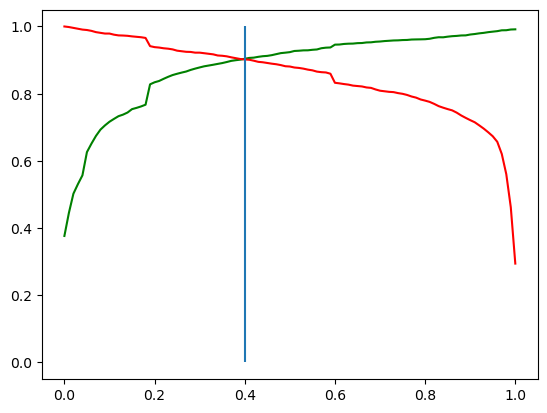

In [136]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.4,ymax=1.00,ymin=0)
plt.show()

In [137]:
y_train_pred_df['Conv_pred']= y_train_pred_df.Conversion_Prob.apply(lambda x:1 if x>0.4 else 0)

In [138]:
y_train_pred_df.head()

,Converted,Conversion_Prob,ID,Conv_pred
1568,1,1.00,1568,1
8620,1,1.00,8620,1
7480,1,0.35,7480,0
4999,0,0.00,4999,0
11,1,1.00,11,1


In [139]:
print('accuracy = ',accuracy_score(y_train_pred_df.Converted,y_train_pred_df.Conv_pred))
print('Precision =',precision_score(y_train_pred_df.Converted,y_train_pred_df.Conv_pred))
print('recall =',recall_score(y_train_pred_df.Converted,y_train_pred_df.Conv_pred))

accuracy =  0.9276993816394482
Precision = 0.9063955950868277
recall = 0.9010526315789473


In [140]:
leads_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(leads_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
leads_test.shape

(2704, 149)

In [146]:
y_test = leads_test['Converted']
X_test_sm = sm.add_constant(leads_test[col10])
y_test_pred = model10.predict(X_test_sm)
y_test_pred = y_test_pred.apply(lambda x:1 if x>0.4 else 0)

In [147]:
print('accuracy = ',accuracy_score(y_test,y_test_pred))
print('Precision =',precision_score(y_test,y_test_pred))
print('recall =',recall_score(y_test,y_test_pred))

accuracy =  0.9175295857988166
Precision = 0.9000969932104753
recall = 0.8854961832061069


In [143]:
from sklearn.metrics import classification_report
classification_report(y_test,y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.93      1656\n           1       0.90      0.89      0.89      1048\n\n    accuracy                           0.92      2704\n   macro avg       0.91      0.91      0.91      2704\nweighted avg       0.92      0.92      0.92      2704\n'